In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*- #

# ------------------------------------------------------------------------------
#
#   Copyright (C) 2022 Concordia NAVlab. All rights reserved.
#
#   @Filename: draw_depth_estimation_res.py
#
#   @Author: Shun Li
#
#   @Date: 2022-01-13
#
#   @Email: 2015097272@qq.com
#
#   @Description:
#
# ------------------------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D

In [3]:
depth_whole = pd.read_csv("/home/ls/m300_depth_filter/m300_depth_data/m300_grabbed_data_1_41.2/depth_estimation.csv")
depth_whole

index         x         y          z  Unnamed: 4
0        76  3.799919 -1.133843  47.270969         NaN
1        76  3.403628 -0.874850  40.417767         NaN
2        76  3.246393 -0.772949  38.999603         NaN
3        76  3.732906 -0.792462  42.373611         NaN
4        76  3.825287 -0.832036  47.594433         NaN
...     ...       ...       ...        ...         ...
2419    243  3.505957 -0.587538  39.428043         NaN
2420    243  3.477168 -0.718928  39.417145         NaN
2421    244  3.224893 -0.741672  39.314571         NaN
2422    244  3.715925 -0.512518  39.940670         NaN
2423    244  3.224954 -0.364370  39.601353         NaN

[2424 rows x 5 columns]

In [4]:
x = depth_whole["x"].to_numpy()
y = depth_whole["y"].to_numpy()
z = depth_whole["z"].to_numpy()
index = depth_whole["index"].to_numpy()

# cond = z < 40
# x = x[cond]
# y = y[cond]
# z = z[cond]
# index = index[cond]


In [5]:
font1 = {'family' : 'Times New Roman',
'weight' : 'bold',
'size'   : 16,
}

In [6]:
def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma

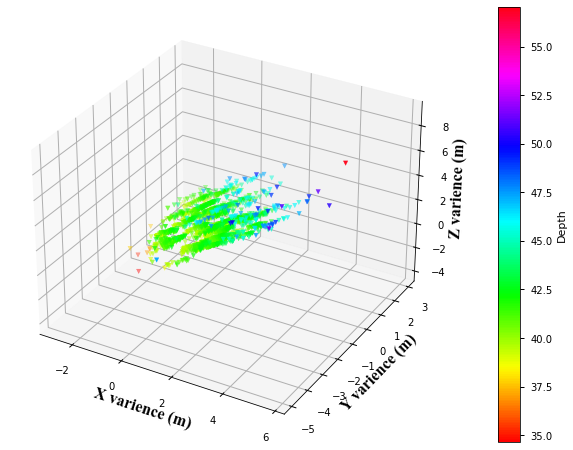

In [7]:
style.use('seaborn-notebook')

fig = plt.figure(figsize=[20,8])
ax = fig.gca(projection='3d')

p2 = ax.scatter3D(standardization(x), standardization(y), standardization(z), marker = "v", c=z, cmap="hsv")

ax.set_xlabel('X varience (m)', font=font1) # 画出坐标轴
ax.set_ylabel('Y varience (m)', font=font1)
ax.set_zlabel('Z varience (m)', font=font1)
fig.colorbar(p2,label="Depth")

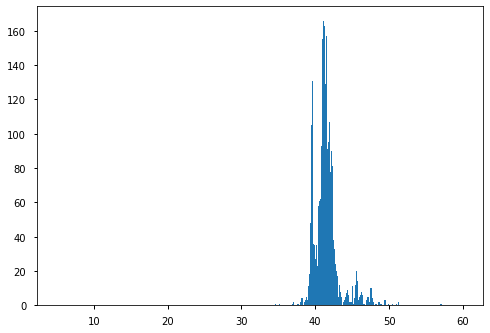

In [8]:
style.use('seaborn-notebook')
n, bins_limits, patches = plt.hist(z, bins=400,range=[5,60])

In [9]:
max_index = np.argmax(n)
max_index

262

In [10]:
print(bins_limits[max_index])

41.025000000000006
